A Python code is written to design Radial Basis Function Network. RBF network is used as a classification algorithm. Here, the network is given (x,y) coordinates which are generated randomly according to the mapping function specified in the question. The network then classifies whether the input coordinate belongs to class-1 or class-2. 

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In the following cell we will generate the data samples keeping in mind the range restrictions given for the x and y coordinates.

In [2]:
# Creating 441 randomly sampled data points
xi = [] #Creating empty list variable for storing x-coordinate
xj = [] #Creating empty list variable for storing y-coordinate

for i in range(21):
    xi.append(-2 + 0.2*i)
    
for j in range(21):
    xj.append(-2 + 0.2*j)
    
data = [] #Creating empty list variable for storing x-y coords

for i in range(21):
    for j in range(21):
        data.append((xi[i], xj[j]))
        
data = np.array(data)

In [3]:
#Creating the labels for the randomly sampled data according to the function given
data_labels = []
for a in range(441):
    if (data[a][0]**2 + data[a][1]**2) <= 1:
        data_labels.append(1)
    else:
        data_labels.append(-1)
        
data_labels = np.array(data_labels)

Visualizing how the generated data looks like and how are the classes made.

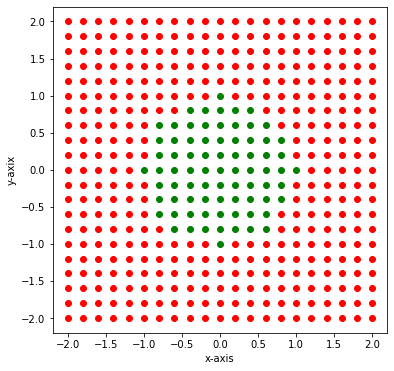

In [4]:
#For visualizing the data
c1 = []
c2 = []

for i in range(len(data_labels)):
    if data_labels[i] == 1:
        c1.append((data[i][0], data[i][1]))
    else:
        c2.append((data[i][0], data[i][1]))
        
c1 = np.array(c1)
c2 = np.array(c2)

fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(c1[:,0], c1[:,1], c='g')
plt.scatter(c2[:,0], c2[:,1], c='r')
plt.xlabel("x-axis")
plt.ylabel("y-axix")

plt.show()

In [5]:
#Definition for accuracy calculation
def accuracy_cal(y_labels, pred_labels):
    return np.mean(y_labels == pred_labels)

In [6]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2, random_state=42)


In [7]:
#Defining the Gaussian activation kernel function for hidden layer
#Defining RBF class and defining the required methods 
class rbf_network():
    
    def Gaussian_act(self, inputs, center, sigma):
        gau = np.empty([inputs.shape[0], center.shape[0]], dtype='float64')

        for i, iv in enumerate(inputs):
            for j, cj in enumerate(center):
                gau[i,j]=np.exp(-(np.linalg.norm(iv-cj)**2)/(2*sigma**2))

        return gau
    
    #Initial random weights
    def ini_weights(self, G, _data_labels):
        weights = np.empty([_data_labels.shape[0],1], dtype='float64')
    
        G_tran = np.transpose(G)
        pseudo_inverse = np.dot(np.linalg.inv(np.dot(G_tran, G)), G_tran)
        
        weights = np.dot(pseudo_inverse, _data_labels)
        
        return weights
    
    def rbf_network_output(self,G, W):
        
        output = np.empty([G.shape[0],1])
        output = np.dot(G,W)
        
        for a in range(len(output)):
            if output[a] >= 0:
                output[a] = 1
            else:
                output[a] = -1
        
        return output

In [8]:
rbf_model = rbf_network()#Creating RBF class model

In [9]:
#Creating array for having various sigma values
width_param = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
              1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

## Radial Basis Function Network:

Multi-Layer Perceptron models are used where linear separability can be carried out. However when there is no linear separability we cannot use MLP. In these situations, we used a special network called as Radial Basis Functions Neural Network which is composed of a single input layer, only one hidden layer and an output layer. 

The RBFN uses non linear tranformation at the hidden layer(Gaussian kernel function is widely used). Although it performs non-linear transformation at the hidden layer the RBFN performs a liner transformation between the hidden and the output layer. The main idea behind this network is that input vectors, cast non-linearly into higher dimensional are more likely to be linearly separable than those in the lower dimensions. 

In the below cell we are training the RBF-NN by calling the methods of the rbf_network class created above. The entire X_train data is considered as the centers for the network as mentioned in the question. Also, we have defined variable named 'width_param' which is array containing sigma values ranging from 0.1 to 2.0 in the step size of 0.1. We trained the RBF network with these centers and the input data and the output was compared with the original labels to quantify the performance our the network. 

In [10]:
#Empty list to store the train error
train_error_mse = []
#empty list to store the test error
test_error_mse = []
#Empty list to store the train accuracy
train_accuracy_score = []
#Empty list to store the test accuracy
test_accuracy_score = []


#for loop to store train and test error for each sigma value also the train and test accuracy.
for sigma in width_param:
    
    gact = rbf_model.Gaussian_act(X_train, X_train, sigma)
    weights = rbf_model.ini_weights(gact, y_train)
    act_op = rbf_model.rbf_network_output(gact, weights)
    
    gact_test = rbf_model.Gaussian_act(X_test, X_train, sigma)
    act_op_test = rbf_model.rbf_network_output(gact_test, weights)
    
    train_accuracy_score.append(accuracy_cal(y_train, act_op))
    test_accuracy_score.append(accuracy_cal(y_test, act_op_test))
    
    test_error = 0
    summ_test = 0

    train_error = 0
    summ = 0
    
    for i in range(len(y_train)):
        summ += (y_train[i] - act_op[i])**2
        
    train_error = summ / len(y_train)
    train_error_mse.append(train_error)
    
    for j in range(len(y_test)):
        summ_test += (y_test[j] - act_op_test[j])**2
        
    test_error = summ_test/len(y_test)
    test_error_mse.append(test_error)
    
    print("sigma = {}   Train_Accuracy = {}   Test_Accuracy = {}".format(sigma, accuracy_cal(y_train, act_op)*100,
                                                                        accuracy_cal(y_test, act_op_test)*100))

sigma = 0.1   Train_Accuracy = 100.0   Test_Accuracy = 95.50561797752809
sigma = 0.2   Train_Accuracy = 100.0   Test_Accuracy = 94.3820224719101
sigma = 0.3   Train_Accuracy = 100.0   Test_Accuracy = 80.89887640449437
sigma = 0.4   Train_Accuracy = 75.2840909090909   Test_Accuracy = 71.91011235955057
sigma = 0.5   Train_Accuracy = 45.45454545454545   Test_Accuracy = 51.68539325842697
sigma = 0.6   Train_Accuracy = 53.97727272727273   Test_Accuracy = 49.43820224719101
sigma = 0.7   Train_Accuracy = 36.93181818181818   Test_Accuracy = 31.46067415730337
sigma = 0.8   Train_Accuracy = 45.17045454545455   Test_Accuracy = 55.0561797752809
sigma = 0.9   Train_Accuracy = 45.73863636363637   Test_Accuracy = 50.56179775280899
sigma = 1.0   Train_Accuracy = 46.02272727272727   Test_Accuracy = 50.56179775280899
sigma = 1.1   Train_Accuracy = 73.86363636363636   Test_Accuracy = 80.89887640449437
sigma = 1.2   Train_Accuracy = 57.67045454545454   Test_Accuracy = 53.93258426966292
sigma = 1.3   Train

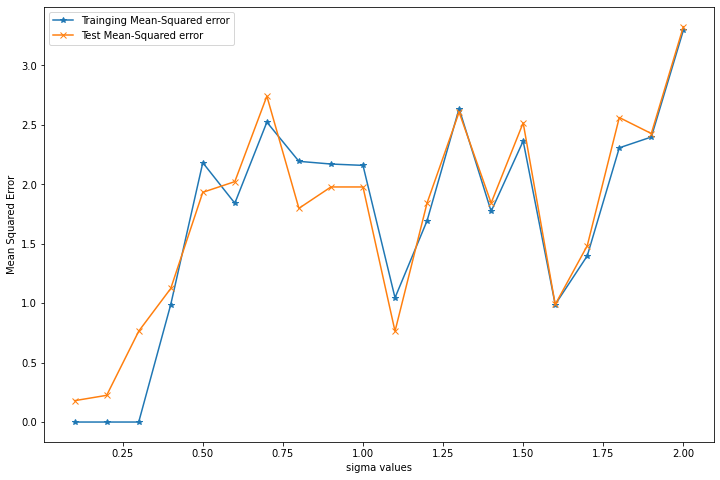

In [11]:
#Plotting the graphs for train and test error vs sigma values
plt.figure(figsize=(12,8))
plt.plot(width_param, train_error_mse, marker='*')
plt.plot(width_param, test_error_mse, marker='x')

# plt.xlim([0.0, 2.0])
plt.xlabel('sigma values')
plt.ylabel('Mean Squared Error')
plt.legend(['Trainging Mean-Squared error', 'Test Mean-Squared error'])
plt.show()

## Analysis : 

The above plot is of Mean squared error vs sigma values. From the plot we can say that as we increase the value of sigma, the exponential function(Gaussian Activation) goes on decreasing and after one point it becomes zero. For small values of sigma, the network performs well. This is because for larger values of sigma the exponential function becomes zero which cannot calculate the weights and hence the error of the network increases.

We can also note that, too sparse or too overlapping activation functions affects the network negatively and hence it degrades the network's performance. Therefore, the range of sigma value should be kept small in order to have better output.

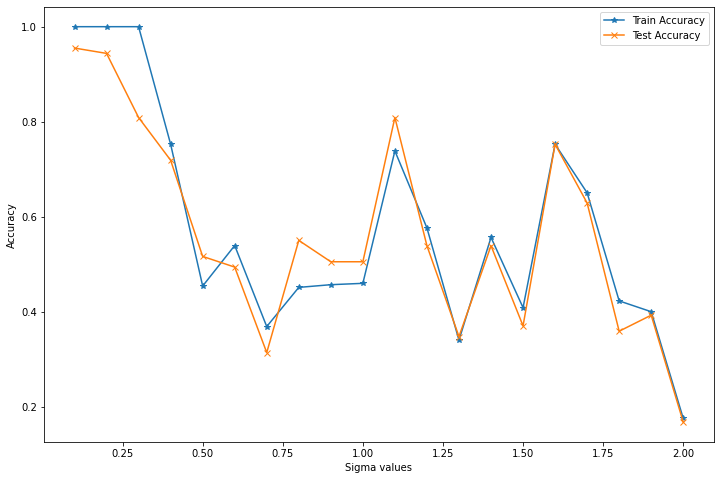

In [12]:
plt.figure(figsize=(12,8))
plt.plot(width_param, train_accuracy_score, marker='*')
plt.plot(width_param, test_accuracy_score, marker='x')
plt.xlabel('Sigma values')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

The above plot shows the train and test accuracy with respect to the sigma values. As expected the accuracy goes on decreasing as the sigma value increases. 

Now, we randomly selected 150 points from the available data as centers for our RBF network. These centers were then used to train the rbf network and the output was compared with the original labels.

In [13]:
#Selecting 150 centers from the training data
random_indexes = np.random.choice(X_train.shape[0], size=150
                                  , replace=False)

In [14]:
my_new_centers = X_train[random_indexes]

In [15]:
#Empty list to store the train accuracy
train_accu_2a = []
#Empty list to store the test accuracy
test_accu_2a = []
#Empty list to store the train error
train_error_mse_2a = []
#Empty list to store the test error
test_error_mse_2a = []

for sigma in width_param:
    
    gact_2a = rbf_model.Gaussian_act(X_train, my_new_centers, sigma)
    weights_2a = rbf_model.ini_weights(gact_2a, y_train)
    act_op_2a = rbf_model.rbf_network_output(gact_2a, weights_2a)
    
    gact_2a_test = rbf_model.Gaussian_act(X_test, my_new_centers, sigma)
    act_op_2a_test = rbf_model.rbf_network_output(gact_2a_test, weights_2a)
    
    train_error = 0
    summ = 0
    
    test_error = 0
    summ_test = 0
    
    for i in range(len(y_train)):
        summ += (y_train[i] - act_op_2a[i])**2
    train_error = summ/len(y_train)
    
    train_error_mse_2a.append(train_error)
    train_accu_2a.append(accuracy_cal(y_train, act_op_2a))
    
    for a in range(len(y_test)):
        
        summ_test += (y_test[a] - act_op_2a_test[a])**2
    test_error = summ_test/len(y_test)
    test_error_mse_2a.append(test_error)
    test_accu_2a.append(accuracy_cal(y_test, act_op_2a_test))
    
    print("sigma = {}   Train_Accuracy = {}   Test_Accuracy = {}".format(sigma, accuracy_cal(y_train, act_op_2a)*100,
                                                                        accuracy_cal(y_test, act_op_2a_test)*100))

sigma = 0.1   Train_Accuracy = 98.29545454545455   Test_Accuracy = 91.01123595505618
sigma = 0.2   Train_Accuracy = 99.43181818181817   Test_Accuracy = 94.3820224719101
sigma = 0.3   Train_Accuracy = 99.7159090909091   Test_Accuracy = 94.3820224719101
sigma = 0.4   Train_Accuracy = 99.7159090909091   Test_Accuracy = 94.3820224719101
sigma = 0.5   Train_Accuracy = 99.7159090909091   Test_Accuracy = 94.3820224719101
sigma = 0.6   Train_Accuracy = 99.7159090909091   Test_Accuracy = 94.3820224719101
sigma = 0.7   Train_Accuracy = 86.07954545454545   Test_Accuracy = 82.02247191011236
sigma = 0.8   Train_Accuracy = 70.17045454545455   Test_Accuracy = 70.78651685393258
sigma = 0.9   Train_Accuracy = 62.5   Test_Accuracy = 71.91011235955057
sigma = 1.0   Train_Accuracy = 24.431818181818183   Test_Accuracy = 26.96629213483146
sigma = 1.1   Train_Accuracy = 20.738636363636363   Test_Accuracy = 24.719101123595504
sigma = 1.2   Train_Accuracy = 58.52272727272727   Test_Accuracy = 52.80898876404494

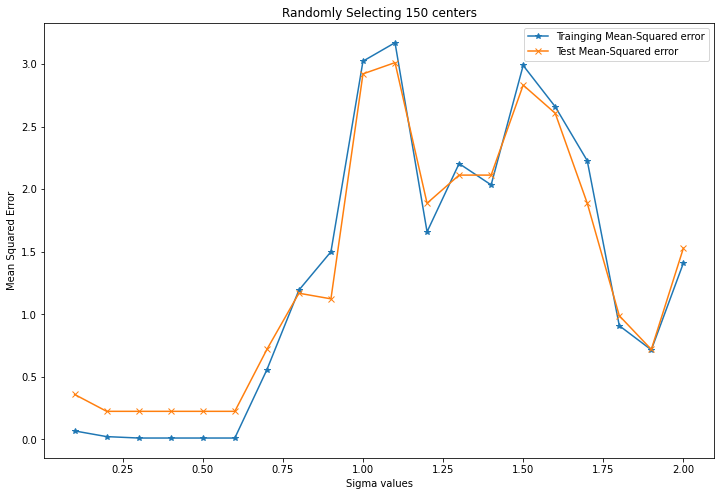

In [16]:
plt.figure(figsize=(12,8))
plt.plot(width_param, train_error_mse_2a, marker='*')
plt.plot(width_param, test_error_mse_2a, marker='x')
plt.title('Randomly Selecting 150 centers')
plt.xlabel('Sigma values')
plt.ylabel('Mean Squared Error')
plt.legend(['Trainging Mean-Squared error', 'Test Mean-Squared error'])
plt.show()

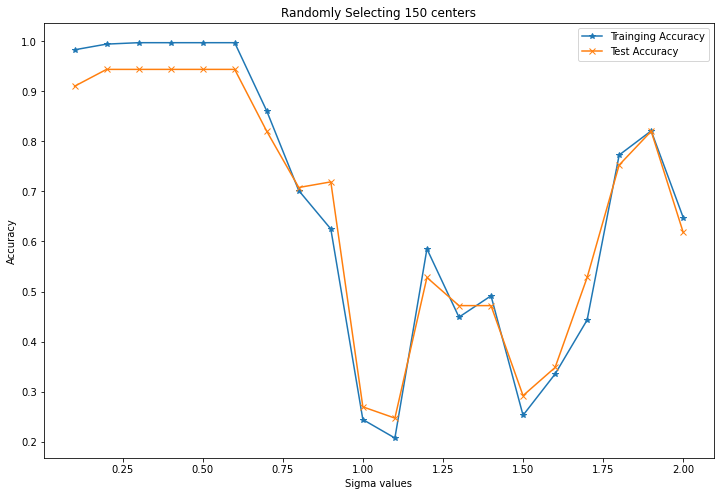

In [17]:
plt.figure(figsize=(12,8))
plt.plot(width_param, train_accu_2a, marker='*')
plt.plot(width_param, test_accu_2a, marker='x')
plt.title('Randomly Selecting 150 centers')
plt.xlabel('Sigma values')
plt.ylabel('Accuracy')
plt.legend(['Trainging Accuracy', 'Test Accuracy'])
plt.show()

## Analysis

From the above plots, we can note that the network performs well until sigma = 0.6. Beyond this value of sigma(width/spread parameter) the network performance gradually decreases as the gaussian activation function tends to zero and hence the network cannot calculate the proper weights. 

Any Machine learning model is said to be efficient when its training error is low and test error is slightly high(or train accuracy is more than the testing accuracy). Keeping this fundamental in mind, from the above two plots we can say that sigma values of 0.3 and 0.6 fits best for the model and for these values our network performs well.

Now we will be using K-Means algorithm to select 150 centers for our RBF network.

In [18]:
#Selecting random 150 centers using k-means
centers = 150

my_clusters = 0

kmeans = KMeans(n_clusters=centers, random_state=51).fit(X_train)
my_clusters = kmeans.cluster_centers_

# gact_2b = rbf_model.Gaussian_act(X_train, my_clusters, 0.5)
# weights_2b = rbf_model.ini_weights(gact_2b, y_train)
# act_op_2b = rbf_model.rbf_network_output(gact_2b, weights_2b)

In [19]:
train_error_mse_2b = []
test_error_mse_2b = []

train_accu_2b = []
test_accu_2b = []

for sigma in width_param:
    
#     my_clusters = 0

#     kmeans = KMeans(n_clusters=centers, random_state=51).fit(X_train)
#     my_clusters = kmeans.cluster_centers_
    
    gact_2b = rbf_model.Gaussian_act(X_train, my_clusters, sigma)
    weights_2b = rbf_model.ini_weights(gact_2b, y_train)
    act_op_2b = rbf_model.rbf_network_output(gact_2b, weights_2b)
    
    gact_2b_test = rbf_model.Gaussian_act(X_test, my_clusters, sigma)
    act_op_2b_test = rbf_model.rbf_network_output(gact_2b_test, weights_2b)
    
    train_error = 0
    summ = 0
    
    test_error_2b = 0
    summ_test_2b = 0
    
    for i in range(len(y_train)):
        summ += (y_train[i] - act_op_2b[i])**2
        
    train_error = summ / len(y_train)
    train_error_mse_2b.append(train_error)
    train_accu_2b.append(accuracy_cal(y_train, act_op_2b))
    
    for a in range(len(y_test)):
        summ_test_2b += (y_test[a] - act_op_2b_test[a])**2
        
    test_error_2b = summ_test_2b / len(y_test)
    test_error_mse_2b.append(test_error_2b)
    test_accu_2b.append(accuracy_cal(y_test, act_op_2b_test))
    
    print("sigma = {}   Train_Accuracy = {}   Test_Accuracy = {}".format(sigma, accuracy_cal(y_train, act_op_2b)*100,
                                                                        accuracy_cal(y_test, act_op_2b_test)*100))

sigma = 0.1   Train_Accuracy = 98.29545454545455   Test_Accuracy = 96.62921348314607
sigma = 0.2   Train_Accuracy = 98.86363636363636   Test_Accuracy = 96.62921348314607
sigma = 0.3   Train_Accuracy = 99.7159090909091   Test_Accuracy = 95.50561797752809
sigma = 0.4   Train_Accuracy = 99.7159090909091   Test_Accuracy = 95.50561797752809
sigma = 0.5   Train_Accuracy = 99.7159090909091   Test_Accuracy = 95.50561797752809
sigma = 0.6   Train_Accuracy = 99.43181818181817   Test_Accuracy = 94.3820224719101
sigma = 0.7   Train_Accuracy = 97.72727272727273   Test_Accuracy = 88.76404494382022
sigma = 0.8   Train_Accuracy = 46.590909090909086   Test_Accuracy = 37.07865168539326
sigma = 0.9   Train_Accuracy = 48.86363636363637   Test_Accuracy = 44.9438202247191
sigma = 1.0   Train_Accuracy = 81.81818181818183   Test_Accuracy = 87.64044943820225
sigma = 1.1   Train_Accuracy = 68.18181818181817   Test_Accuracy = 69.66292134831461
sigma = 1.2   Train_Accuracy = 73.01136363636364   Test_Accuracy = 67

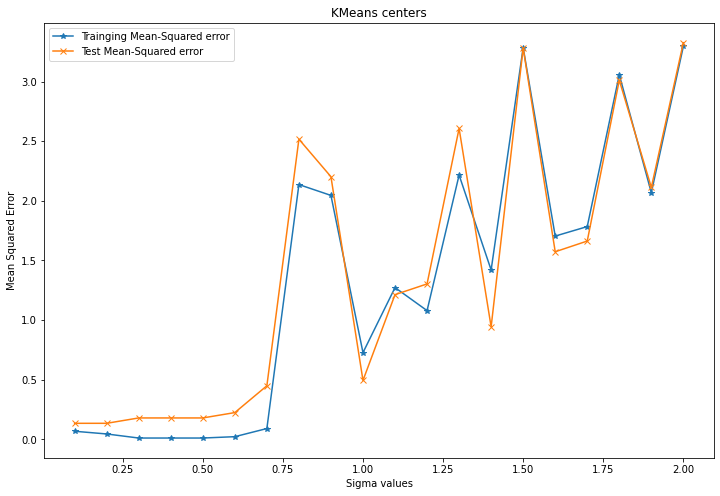

In [20]:
plt.figure(figsize=(12,8))
plt.plot(width_param, train_error_mse_2b, marker='*')
plt.plot(width_param, test_error_mse_2b, marker='x')
plt.title('KMeans centers')
plt.xlabel('Sigma values')
plt.ylabel('Mean Squared Error')
plt.legend(['Trainging Mean-Squared error', 'Test Mean-Squared error'])
plt.show()

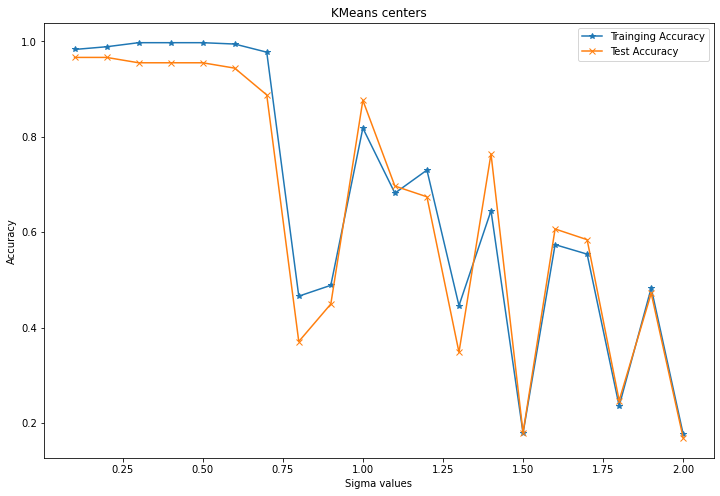

In [21]:
plt.figure(figsize=(12,8))
plt.plot(width_param, train_accu_2b, marker='*')
plt.plot(width_param, test_accu_2b, marker='x')
plt.title('KMeans centers')
plt.xlabel('Sigma values')
plt.ylabel('Accuracy')
plt.legend(['Trainging Accuracy', 'Test Accuracy'])
plt.show()

## Analysis:

Comparing the above plots we the earlier plots, we can say that the model whose centers are selected using k-means algorithm out performs the other two models as kmeans is preferred for unsupervised learning. Also, Kmeans clustering algorithm classifies the clusters sharply due to which its accuracy is better. 

## Accuracy Comparison

In [22]:
##Comparing performance of all the networks 

new_sigma_values = [0.2, 0.4, 0.6, 0.8, 1.0]
test_accu_1 = []
test_Accu_2a = []
test_Accu_2b = []

for sigma in new_sigma_values:
    #1st RBFNN
    gact_1 = rbf_model.Gaussian_act(X_train, X_train, sigma)
    weights_1 = rbf_model.ini_weights(gact_1, y_train)
    op_1 = rbf_model.rbf_network_output(gact_1, weights_1)
    
    gact_test_1 = rbf_model.Gaussian_act(X_test, X_train, sigma)
    op_test_1 = rbf_model.rbf_network_output(gact_test_1, weights_1)
    
    test_accu_1.append(accuracy_cal(y_test, op_test_1))
    
    #RBFNN 2a
    gact_com_2a = rbf_model.Gaussian_act(X_train, my_new_centers, sigma)
    weights_com_2a = rbf_model.ini_weights(gact_com_2a, y_train)
    op_2a = rbf_model.rbf_network_output(gact_com_2a, weights_com_2a)
    
    gact_test_2a = rbf_model.Gaussian_act(X_test, my_new_centers, sigma)
    op_test_2a = rbf_model.rbf_network_output(gact_test_2a, weights_com_2a)
    
    test_Accu_2a.append(accuracy_cal(y_test, op_test_2a))
    
    #RBFNN 2b
    gact_com_2b = rbf_model.Gaussian_act(X_train, my_clusters, sigma)
    weights_com_2b = rbf_model.ini_weights(gact_com_2b, y_train)
    op_2b = rbf_model.rbf_network_output(gact_com_2b, weights_com_2b)
    
    gact_test_2b = rbf_model.Gaussian_act(X_test, my_clusters, sigma)
    op_test_2b = rbf_model.rbf_network_output(gact_test_2b, weights_com_2b)
    
    test_Accu_2b.append(accuracy_cal(y_test, op_test_2b))
    
    

In [23]:
accu_1 = test_accu_1[2]
accu_2a = test_Accu_2a[2]
accu_2b = test_Accu_2b[2]

print("Accuracy of part-1 {}  Accuracy for part-2a {}  Accuracy for part-2b {}".format(accu_1*100, accu_2a*100, 
                                                                                       accu_2b*100))

Accuracy of part-1 49.43820224719101  Accuracy for part-2a 94.3820224719101  Accuracy for part-2b 94.3820224719101


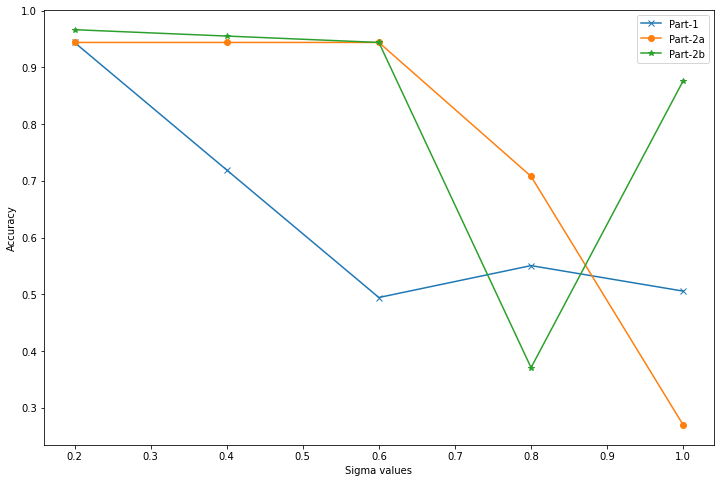

In [24]:
plt.figure(figsize=(12,8))
plt.plot(new_sigma_values, test_accu_1, marker='x')
plt.plot(new_sigma_values, test_Accu_2a, marker='o')
plt.plot(new_sigma_values, test_Accu_2b, marker='*')
plt.xlabel('Sigma values')
plt.ylabel('Accuracy')
plt.legend(['Part-1', 'Part-2a', 'Part-2b'])
plt.show()

## MSE Comparison

In [25]:
sigmas = [0.1,0.2,0.3,0.4,0.5,0.6]

mse_part1 = []
mse_part2a = []
mse_part2b = []

for sigma in sigmas:
    
    #part1 NN
    mse_gact_1 = rbf_model.Gaussian_act(X_train, X_train, sigma)
    mse_wt_1 = rbf_model.ini_weights(mse_gact_1, y_train)
#     mse_op_1 = rbf_model.rbf_network_output(mse_gact_1, mse_wt_1)
    
    mse_test_gact_1 = rbf_model.Gaussian_act(X_test, X_train, sigma)
    mse_test_op_1 = rbf_model.rbf_network_output(mse_test_gact_1, mse_wt_1)
    
    mse_part1.append(np.square(np.subtract(y_test, mse_test_op_1)).mean())
    
    #part 2a NN
    mse_gact_2a = rbf_model.Gaussian_act(X_train, my_new_centers, sigma)
    mse_wt_2a = rbf_model.ini_weights(mse_gact_2a, y_train)
    
    mse_test_gact_2a = rbf_model.Gaussian_act(X_test, my_new_centers, sigma)
    mse_test_op_2a = rbf_model.rbf_network_output(mse_test_gact_2a, mse_wt_2a)
    
    mse_part2a.append(np.square(np.subtract(y_test, mse_test_op_2a)).mean())
    
    #part 2b NN
    mse_gact_2b = rbf_model.Gaussian_act(X_train, my_clusters, sigma)
    mse_wt_2b = rbf_model.ini_weights(mse_gact_2b, y_train)
    
    mse_test_gact_2b = rbf_model.Gaussian_act(X_test, my_clusters, sigma)
    mse_test_op_2b = rbf_model.rbf_network_output(mse_test_gact_2b, mse_wt_2b)
    
    mse_part2b.append(np.square(np.subtract(y_test, mse_test_op_2b)).mean())
    
    

In [26]:
mse_1 = mse_part1[5]
mse_2a = mse_part2a[5]
mse_2b = mse_part2b[5]

print("MSE of part-1 {}  MSE for part-2a {}  MSE for part-2b {}".format(mse_1, mse_2a, mse_2b))

MSE of part-1 2.0224719101123596  MSE for part-2a 0.2247191011235955  MSE for part-2b 0.2247191011235955


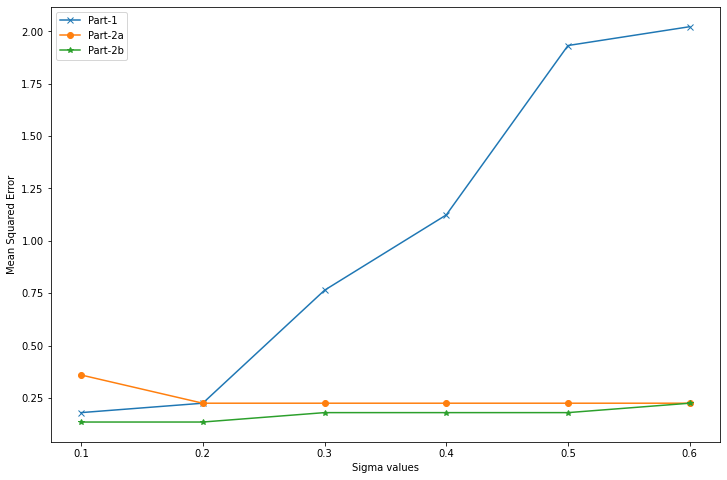

In [27]:
plt.figure(figsize=(12,8))
plt.plot(sigmas, mse_part1, marker='x')
plt.plot(sigmas, mse_part2a, marker='o')
plt.plot(sigmas, mse_part2b, marker='*')
plt.xlabel('Sigma values')
plt.ylabel('Mean Squared Error')
plt.legend(['Part-1', 'Part-2a', 'Part-2b'])
plt.show()

In [28]:
mse_prnt = mse_part2b[1]
mse_prnt

0.1348314606741573

## Analysis

From the above plot we can see that the network having 2-phase learning (centers selected with help of kmeans algorithm) performs well as compared to the rest of the networks. K-means clustering algorithm better classifies the data and assigns well defined clusters which helps in visualizing the data and making well informed decisions.

Also, the model in part 2b performed well as its mean squared error remained approximately constant for all the sigma values taken into consideration. The lowest MSE is **~0.13**.

Moreover, Kmeans clustering works best when dealing with the spherical clusters. In this situation it operates with an assumption of joint-distributions of feature vectors since shape of each cluster is spherical. 